In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from sklearn.datasets import fetch_lfw_people

In [4]:
faces = fetch_lfw_people(min_faces_per_person=70)

In [5]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [6]:
len(faces.target_names)

7

In [7]:
faces.target

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [8]:
np.unique(faces.target)

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

Ariel Sharon


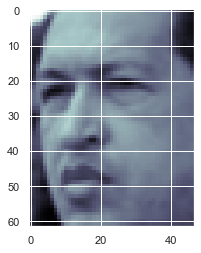

In [11]:
plt.imshow(faces.images[0],cmap='bone')
print(faces.target_names[0])

In [12]:
faces.images[0].shape

(62, 47)

In [13]:
62*47

2914

In [14]:
X = faces.data

In [15]:
X.shape

(1288, 2914)

In [16]:
y = faces.target

In [18]:
y.shape

(1288,)

In [19]:
y[100]

3

In [20]:
faces.target_names[y[100]]

'George W Bush'

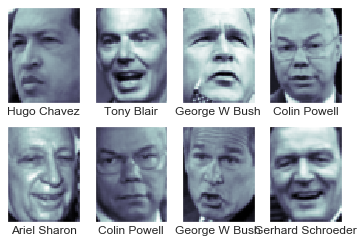

In [22]:
fig, ax = plt.subplots(2,4)
for idx,axidx in enumerate(ax.flat):
    axidx.imshow(faces.images[idx],cmap = 'bone')
    axidx.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[idx]])

In [23]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

In [29]:
idx = np.random.randint(ytest.size)
xt = Xtest[idx]
nnidx = np.argmin(((Xtrain-xt)**2).sum(axis=1))
y_pred = ytrain[nnidx]
y_true = ytest[idx]
print(y_true,y_pred)


2 2


In [31]:
from sklearn.svm import SVC
m = SVC(gamma='auto',kernel = 'rbf')
m.fit(Xtrain,ytrain)
y_pred = m.predict(Xtest)
acc = 100*((y_pred == ytest).sum()/ytest.size)
print("Acc is ",acc,"%")

Acc is  47.286821705426355 %


In [34]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [36]:
mPca = PCA(n_components=300)
mSvm = SVC(gamma='auto')
m = make_pipeline(mPca,mSvm)
m.fit(Xtrain,ytrain)
y_pred = m.predict(Xtest)
acc = 100*((y_pred == ytest).sum()/ytest.size)
print("Acc is ",acc,"%")

Acc is  47.286821705426355 %


In [37]:
from sklearn.ensemble import RandomForestClassifier
mR = RandomForestClassifier(n_estimators = 30)
mR.fit(Xtrain,ytrain)
y_pred = mR.predict(Xtest)
acc = 100*((y_pred == ytest).sum()/ytest.size)
print("Acc is ",acc,"%")

Acc is  60.07751937984496 %
